HW1

## ASSIGNMENT TASKS

### (35%) Perform Exploratory Data Analysis (EDA) and apply basic statistical concepts to under- stand the underlying data

&#167; **In the first task, we are going to load the data into a DataFrame using the standard pd.read_csv(). After loading the dataset, answer the following basic questions using the data:**

1. What is the median price of a diamond over the entire dataset?
2. What is the mean?
3. Of the diamonds between 1.50 and 3 carats, what is the median price?
4. How many Premium cut diamonds with VVS1, I1 and IF clarity are there (regardless of color)? 
5. For diamonds between price 3500 - 7000, what is the mean carat size?

In [189]:
import pandas as pd
import numpy as np

In [190]:
df=pd.read_csv("https://gist.githubusercontent.com/sarchak/b87ad2be315ce05f7a047550646f3c41/raw/0c7d83608111f74f212398fc0d2a704e4f8dc499/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### 1. What is the median price of a diamond over the entire dataset?

In [3]:
df['price'].median()

2401.0

#### 2. What is the mean?

In [4]:
df['price'].mean()

3932.799721913237

#### 3. Of the diamonds between 1.50 and 3 carats, what is the median price?

In [171]:
df[(1.50< df['carat'])&(3 > df['carat'])]['price'].mean()

12566.155868196964

#### 4. How many Premium cut diamonds with VVS1, I1 and IF clarity are there (regardless of color)? 

In [6]:
df1=df.loc[((df['clarity']=='VVS1') | (df['clarity']=='I1') | (df['clarity']=='IF'))]
df2=df1.loc[df['cut']=='Premium']
df2['cut'].count()

1051

#### 5. For diamonds between price 3500 - 7000, what is the mean carat size?

In [175]:
df[(3500< df['price'])&(7000 > df['price'])]['carat'].mean()

1.0535832305795725

&#167; Now that we have some warmups out of the way, let’s learn a little about MultiIndex in Pandas. Often we are confronted with data that may benefit from a different arrangment of the data in the DataFrame. Concretely, imagine you are building a table for the participants in a marathon. Often marathons group runners into age groups, sometimes runners are grouped by sex, and other times runners may be grouped by country and even competitive or non-competitive groups. Clearly, when looking at the data, we might like to see the data broken down into a hierarchy of those groups – we might want to traverse all Male, competitive, age 30-40 runners from Greece into a table.

The visual value of this cannot be overstated – clearly writing queries against such data is important, but so is being able display this data in a form that it can be communicated to others in a tabular form. This is where Pandas MultiIndex comes into play. You will want to read up on this in order to perform the next task and to answer the following questions. Before you answer the questions, make sure your indices are as follows:

• in your Multindex DataFrame the row indices are nested with cut in the outer index, color in the inner index.

• the columns will be the clarity

• the values for a given (cut, color, clarity) will the mean value for that combination. For example, if
you were to go into the data and select all Ideal cut, E color, SI1 clarity diamonds and computed the mean, you would insert that into the table for that multi-index and column. HINT: don’t overthink this step as the multi-index, column can be accessed with something like .loc[ (cut, color), clarity] and you can just set the value to the mean for all the rows meeting that criterion from the origin imported table. You WILL have to create a new DataFrame – do not try to replace the original imported DataFrame in-place.This will not go well.

#### 1. output of multi-index DataFrame

In [16]:
df_multi_price=pd.pivot_table(df,index=['cut','color'], columns='clarity',values='price',aggfunc = np.mean)
df_multi_price

clarity                   I1            IF          SI1          SI2  \
cut       color                                                        
Fair      D      7383.000000   1619.666667  4273.344828  4355.142857   
          E      2095.222222           NaN  3901.153846  4172.384615   
          F      2543.514286   2344.000000  3784.686747  4520.112360   
          G      3187.471698   1488.000000  3579.362319  5665.150000   
          H      4212.961538           NaN  5195.800000  6022.406593   
          I      3501.000000           NaN  4574.966667  6658.022222   
          J      5795.043478           NaN  4553.928571  5131.814815   
Good      D      3490.750000  10030.333333  3021.172996  3595.295964   
          E      4398.130435   1519.222222  3162.132394  3785.490099   
          F      2569.526316   3132.866667  3261.454212  4426.786070   
          G      3195.789474   4060.136364  4129.328502  4776.411043   
          H      3849.714286   5948.750000  4179.285106  5529.778481   
          I      4175.444444   1749.333333  4742.945455  6933.012346   
          J      3794.500000   2738.000000  4627.625000  5306.113208   
Ideal     D      3526.923077   6567.178571  2490.459350  3142.047753   
          E      3559.388889   3258.936709  2883.808094  3891.302772   
          F      3903.452381   2153.708955  3710.322368  4335.507726   
          G      4044.437500   2206.030550  3441.107576  4612.086420   
          H      5415.184211   1982.765487  4769.988204  5589.473333   
          I      4103.294118   1502.621053  5178.565476  7191.912409   
          J      9454.000000   2489.000000  5115.674897  6555.172727   
Premium   D      3818.750000   9056.500000  3236.377698  4351.085511   
          E      3199.266667   4525.444444  3362.625407  4489.930636   
          F      3554.558824   3617.580645  4040.467105  4747.089866   
          G      4051.521739   3311.114943  4303.348057  5617.205285   
          H      3904.347826   3384.750000  5707.722137  6718.946257   
          I      5044.625000   2358.565217  6092.092643  7148.483974   
          J      4577.230769   7026.000000  5726.578947  7550.285714   
Very Good D      2622.800000  10298.260870  3234.931174  4425.458599   
          E      3443.545455   4332.744186  3228.175719  4279.447191   
          F      4252.923077   4677.074627  3574.291592  4249.758017   
          G      3194.812500   3525.240506  3481.871308  4699.269113   
          H      5258.833333   2647.689655  4933.945155  6112.413994   
          I      6045.125000   4093.894737  5195.301676  6621.600000   
          J      4478.375000   1074.125000  5026.543956  5992.898438   

clarity                  VS1          VS2         VVS1         VVS2  
cut       color                                                      
Fair      D      2921.200000  4512.880000  4473.000000  3607.000000  
          E      3307.928571  3041.714286  4115.333333  3119.307692  
          F      4103.060606  3400.471698  4679.800000  4018.200000  
          G      3497.622222  5384.444444  2216.333333  3099.058824  
          H      4604.750000  5110.926829  4115.000000  3481.727273  
          I      4500.480000  3856.125000  4194.000000  2994.625000  
          J      5906.187500  4067.826087  1691.000000  2998.000000  
Good      D      3556.581395  3588.461538  2586.230769  2345.640000  
          E      3712.775281  3772.018750  1905.953488  3390.153846  
          F      2787.507576  3790.543478  2189.514286  3192.360000  
          G      4302.427632  4140.713542  2705.195122  3310.466667  
          H      3819.116883  4433.043478  1719.709677  2428.000000  
          I      4597.165049  5956.563636  2650.954545  2758.000000  
          J      3662.826923  4803.166667  4633.000000  4371.153846  
Ideal     D      2576.039886  2111.927174  2705.777778  3619.014085  
          E      2175.797639  2163.323944  2205.519403  2556.335306  
          F      3504.001623  3317.204778  2611.234091  3323.628846  
     

In [17]:
df_multi_price=df_multi_price.replace(np.nan,0)

&#167; Now that you have the DataFrame. there is one last thing to do so that you can answer some more interesting questions.
Pandas provides an interesting and simple way to stylize the background of your table to print it as a kind of heatmap. Based on the values, different cells will take on different colors. To save you some time, you can use the following code snippets to print out your data with a more useful color coding:

import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
df_multi_idx.astype('float').style.background_gradient(cmap=cm)

where df_multi_idx is the your multi-index DataFrame. It will look something like Figure 2 below and you will agree it is a great improvement over the original. NOTE: you are free to play with a palette other than green, since the example code is just that and you can modify it to your liking.

In [22]:
import seaborn as sns
cm = sns.light_palette("black", as_cmap=True)
df_multi_price.astype('float').style.background_gradient(cmap=cm)

Now answer the following questions:
    
#### 1. If we are looking at J color, Ideal cut diamonds, what seems unusual about the I1 clarity mean price? Recall, J color are considered the color right before faint yellow and are considered the least quality color rating.


It has highest mean price(9454)among ideal cut diamonds

#### 2. Can you make a general observation about the average prices trends? What are you noticing, especially about the average prices as the color gets worse?


Average price of premium cut diamonds are high when compared to other categories

The average price increases when the color get's worse

#### 3. Which cut, color and clarity has the highest overall mean price?

Very Good cut, D color and IF clarity diamonds has the highest overall mean price (10298.3)

&#167; Now that you have seen a trend on prices, instead of computing the mean price, compute the mean carat size of the diamond and perform the same tabular gradient enhancement.

In [19]:
df_multi_carat=pd.pivot_table(df,index=['cut','color'], columns='clarity',values='carat',aggfunc = np.mean)
df_multi_carat=df_multi_carat.replace(np.nan,0)

In [21]:
df_multi_carat

clarity                I1        IF       SI1       SI2       VS1       VS2  \
cut       color                                                               
Fair      D      1.877500  0.380000  0.913793  1.016964  0.630000  0.843600   
          E      0.968889  0.000000  0.867077  1.015641  0.632857  0.690238   
          F      1.023429  0.555000  0.864096  1.080112  0.804848  0.758679   
          G      1.226415  0.455000  0.909565  1.262000  0.774222  0.977778   
          H      1.498654  0.000000  1.112267  1.364396  0.975937  1.036829   
          I      1.322941  0.000000  1.108000  1.511556  1.010400  0.953125   
          J      1.993478  0.000000  1.181071  1.316667  1.229375  1.032609   
Good      D      1.040000  0.786667  0.700802  0.858251  0.663256  0.702500   
          E      1.330870  0.373333  0.723859  0.882574  0.680674  0.739375   
          F      0.976316  0.533333  0.768278  1.002537  0.624621  0.752120   
          G      1.174211  0.648182  0.883816  1.086933  0.779211  0.815677   
          H      1.252143  0.935000  0.906723  1.173544  0.779870  0.877971   
          I      1.410000  0.530000  1.015273  1.424815  0.926602  1.129636   
          J      1.370000  0.690000  1.125795  1.318868  0.875000  1.114333   
Ideal     D      0.960000  0.615714  0.594797  0.750309  0.533504  0.499293   
          E      1.037778  0.457722  0.670627  0.874414  0.503592  0.521136   
          F      1.107857  0.411493  0.769605  0.932185  0.644042  0.632241   
          G      1.168750  0.454705  0.760258  0.976111  0.717146  0.769703   
          H      1.475526  0.474602  0.937208  1.143822  0.706531  0.796043   
          I      1.298235  0.451474  1.027639  1.378467  0.806103  0.927900   
          J      1.990000  0.576800  1.143909  1.384455  0.978358  1.051250   
Premium   D      1.155000  0.708000  0.691655  0.918907  0.687099  0.584572   
          E      1.043000  0.576296  0.726287  0.957669  0.643151  0.618935   
          F      1.135294  0.525484  0.842122  1.035220  0.767345  0.730953   
          G      1.291304  0.564023  0.882721  1.142703  0.750177  0.809459   
          H      1.339783  0.598000  1.084046  1.328292  0.779613  1.004643   
          I      1.605833  0.573043  1.180354  1.424006  0.982624  1.235905   
          J      1.578462  1.141667  1.257799  1.554534  1.136209  1.245743   
Very Good D      0.950000  0.803043  0.707834  0.931720  0.583371  0.633657   
          E      1.069545  0.579302  0.723083  0.930404  0.609795  0.664414   
          F      1.210769  0.606866  0.796458  0.951195  0.688055  0.742017   
          G      1.123750  0.600380  0.785759  1.032752  0.701319  0.810271   
          H      1.654167  0.558276  0.973967  1.234636  0.772335  0.893165   
          I      1.766250  0.764737  1.065894  1.334350  0.985415  1.066350   
          J      1.462500  0.455000  1.135330  1.360938  0.964917  1.140543   

clarity              VVS1      VVS2  
cut       color                      
Fair      D      0.606667  0.591111  
          E      0.640000  0.600769  
          F      0.668000  0.627000  
          G      0.570000  0.664706  
          H      0.910000  0.840909  
          I      0.900000  0.845000  
          J      0.700000  1.010000  
Good      D      0.490769  0.481200  
          E      0.418140  0.560192  
          F      0.465714  0.607600  
          G      0.547073  0.626133  
          H      0.473548  0.588444  
          I      0.666364  0.719615  
          J      1.000000  0.936923  
Ideal     D      0.460139  0.544789  
          E      0.426507  0.483905  
          F      0.476182  0.577308  
          G      0.539108  0.646085  
          H      0.493497  0.567301  
          I      0.551341  0.653820  
          J      0.578276  0.870556  
Premium   D      0.538250  0.580532  
          E      0.462286  0.511570  
          F      0.606250  0.657603  
          G      0.535146  0.692655  
          H      0.416250  0.577458  
          I 

In [23]:
cm = sns.light_palette("black", as_cmap=True)
df_multi_carat.astype('float').style.background_gradient(cmap=cm)

Answer the following questionsn looking at the tables you’ve generated:
#### 1. What seems to be the trend in carat size, especially as it relates to cut and color?
        

carat size of premium cut diamonds are higher than other categories

#### 2. Which cut (regardless of color) has the largest mean carat size? Is this a surprising outcome? Explain in a sentence or two what you think is going on?

Fair cut, J color and I1 clarity has the largest mean carat size (1.99348)

Plot a scatterplot of all the raw data with price on the y-axis and carats on the x-axis using this as a template:

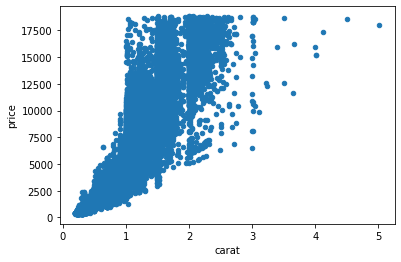

In [43]:
df.loc[:,['price','carat']].plot(kind='scatter', x='carat', y='price')

#### 1. Does your plot support the claim that price increases as carats increase?

Yes price increases as carat size increase
The density of the diamonds are high between 1 and 2 carats

### (35%) Explore PDF and CDF with Pandas and Seaborn

#### 1. Produce a count of the diamond clarities using the pandas.DataFrame.value_counts() method. Show the count of diamonds on a bar graph using plot(kind="bar").

In [31]:
df['clarity'].value_counts(ascending=True)

I1        741
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
SI2      9194
VS2     12258
SI1     13065
Name: clarity, dtype: int64

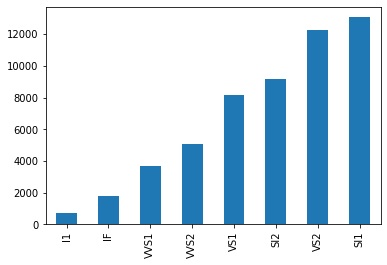

In [33]:
df['clarity'].value_counts(ascending=True).plot(kind='bar')

#### 2. What observation can you make about the trend in the count of diamonds in each clarity category?

Number of diamonds in I1,IF and VVS1 are low and SI1 has the highest number of diamonds

#### 3. How do the numbers of diamonds in the “SI” and “IF/FL” groups compare?

SI group diamonds varies between 8500 and 12500. IF group diamonds are less than 2000

§ Now that we have an understanding of how many diamonds we have in each clarity group, let’s compare the distribution of carats for each. To do this we are going to turn to Seaborn’s distplot() method. Read about distplot() here,

You now have a cumulative distribution for each clarity. You will be reminded that the y-axis shows us the cumulative probability while the x-axis shows us the carat sizes. The smoothed curve shows the density of the carat for a given probability and uses a smoothing technique called kernel density estimate. After displaying the plot from the code above in your notebook, answer the following questions:

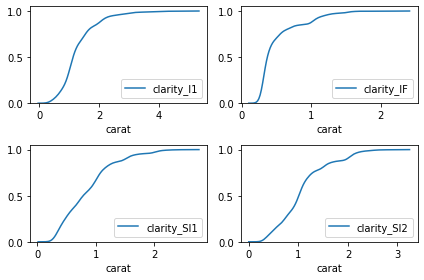

In [186]:
plt.title("Comparing Cumulative Distribution of Carat for I1") 
plt.title("Comparing Cumulative Distribution of Carat for I1, IF, SI1 and SI2")
plt.subplot(2,2,1)
kwargs = {'cumulative': True}

sns.distplot(df[df['clarity']=='I1']['carat'], hist=False, hist_kws=kwargs, kde_kws=kwargs, label="clarity_I1")
plt.subplot(2,2,2)
kwargs = {'cumulative': True}

sns.distplot(df[df['clarity']=='IF']['carat'], hist=False, hist_kws=kwargs, kde_kws=kwargs, label="clarity_IF")
plt.subplot(2,2,3)
kwargs = {'cumulative': True}

sns.distplot(df[df['clarity']=='SI1']['carat'], hist=False, hist_kws=kwargs, kde_kws=kwargs, label="clarity_SI1")
plt.subplot(2,2,4)
kwargs = {'cumulative': True}

sns.distplot(df[df['clarity']=='SI2']['carat'], hist=False, hist_kws=kwargs, kde_kws=kwargs, label="clarity_SI2")
plt.tight_layout()

#### 1. Which color has the largest relative distribution of high carat diamonds?

I1 clarity has the largest relative distribution of high carat diamonds

#### 2. Which has the largest relative distribution of small diamonds?

IF has the latgest relative distribution of small diamonds

#### 3. Based on the prior two questions, is this a surprising outcome?

Yes,this is a surprising outcome

#### 4. Which two distributions look most similar?

SI1 and SI2 graphs look most similar to each other

§ We’re now at the point where we’d like to graph this same data in two dimensions, with what is called the kernel density estimate plot or KDE plot. The KDE plot takes our bivariate data as input and outputs a smoothed 2D contour plot. You see, in the example above, we only showed a single feature of the data. While interesting, it is far more interesting when we compare two variables. Indeed, since diamonds are generally considered a luxury item, and not typically considered “inexpensive”, we might like to know how carat size influences price. This makes things a bit more interesting and useful.

We’re going to use the KDE plot to visually compare the densities of carat and price.

You may want to only plot each alone or no more than 2 per plot so you can see the data. After you have the plots, make sure you save them and include them in your zipped submission. Then answer the questions below based on your plots:


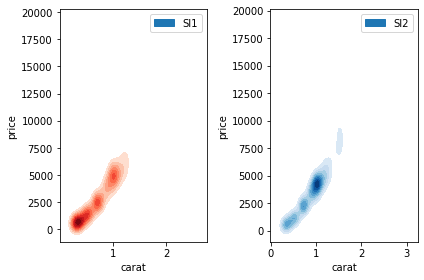

In [18]:
plt.subplot(1,2,1)
sns.kdeplot( df1['carat'], df1['price'],cmap="Reds",shade=True,shade_lowest=False, label="SI1")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot( df3['carat'], df3['price'],cmap="Blues",shade=True,shade_lowest=False, label="SI2")
plt.legend()
plt.tight_layout()
plt.savefig("SI1 and SI2.png")

#### 1. How do the density plots compare to one another? What general observation can you make about the typical SI1 and SI2 diamonds? What are their similarities?

The two density plots are similar to each other.

SI1 diamonds are densely packed between 0 - 2500 range. And the over all range of SI1 diamonds lies between 0 - 7500.

SI2 diamonds are densely packed between 3000-5000 range. And the over all range of SI1 diamonds lies between 0 - 7500.

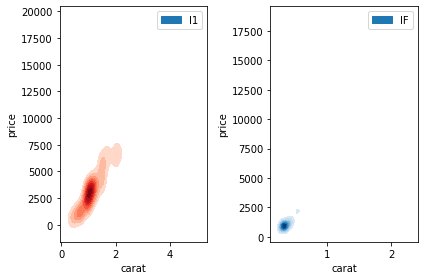

In [122]:
plt.subplot(1,2,1)
sns.kdeplot( df8['carat'], df8['price'],cmap="Reds",shade=True,shade_lowest=False, label="I1")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot( df7['carat'], df7['price'],cmap="Blues",shade=True,shade_lowest=False, label="IF")
plt.legend()
plt.tight_layout()
plt.savefig("IF and I1.png")

#### 2. What about the density plots for I1 and IF? How are they different? Please provide as much description to support your answer.

There is a lot of difference between I1 and IF density plots

I1 clarity diamonds are densily distributed between the range of 0 to 7500 and IF diamonds are less than 1 carat 

IF clarity diamonds are only distributed between 0 to 2000 and but I1 diamonds are upto 2 carats

#### 3. From the plots alone, what can you make of the price density of 1-carat SI1 diamonds versus those of SI2 diamonds?

The price density of 1-carat SI1 and SI2 diamonds are around 2500$

#### 4. What would you say of the claim: “If clarity is of great concern to you, best value diamonds are in found in the I1 clarity.”? What challenges could you make to this claim based on the KDE plots? What are
the supports for this claim?

I strongly support the claim stating that best value diamonds are found in the I1 clarity

* As we all know that I1 clarity has the largest relative distribution of high carat diamonds
* If we observe the KDE Plot the general distribution of price ranges between 0 -7500, On closer observation the price density is higher between 2500 - 5000 

#### 5. Write a query using the DataFrame.query() method to show the descriptive statistics for clarity I1 and
clarity SI1 diamonds. You can use the DataFrame.describe() method to get the descriptive statistics. The
query method will restrict diamonds between .95 and 1.05 carats for each color.

In [187]:
df[df['clarity']=='I1'].query('carat > 0.95 and carat < 1.05')

,carat,cut,color,clarity,depth,table,price,x,y,z
215,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94
241,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03
315,0.96,Ideal,F,I1,60.7,55.0,2801,6.37,6.41,3.88
323,1.04,Premium,G,I1,62.2,58.0,2801,6.46,6.41,4.00
369,1.00,Fair,G,I1,66.4,59.0,2808,6.16,6.09,4.07
...,...,...,...,...,...,...,...,...,...,...
53564,1.00,Premium,H,I1,61.3,60.0,2695,6.39,6.43,3.93
53692,1.00,Good,F,I1,64.2,59.0,2717,6.26,6.30,4.03
53745,1.00,Fair,G,I1,61.7,57.0,2723,6.39,6.28,3.91
53875,1.04,Very Good,I,I1,61.6,61.0,2745,6.45,6.47,3.98


In [127]:
df[df['clarity']=='SI1'].query('carat > 0.95 and carat < 1.05')

,carat,cut,color,clarity,depth,table,price,x,y,z
423,0.99,Fair,J,SI1,55.0,61.0,2812,6.72,6.67,3.68
710,1.03,Good,J,SI1,63.6,57.0,2855,6.38,6.29,4.03
713,1.02,Fair,I,SI1,53.0,63.0,2856,6.84,6.77,3.66
719,1.00,Fair,I,SI1,67.9,62.0,2856,6.19,6.03,4.15
827,0.96,Premium,I,SI1,61.3,58.0,2866,6.39,6.30,3.89
...,...,...,...,...,...,...,...,...,...,...
17994,1.02,Very Good,E,SI1,63.7,55.0,7277,6.29,6.40,4.04
18554,1.02,Ideal,D,SI1,61.7,56.0,7564,6.40,6.49,3.97
50958,1.01,Very Good,I,SI1,60.9,63.0,2323,6.51,6.43,3.94
52470,0.96,Fair,J,SI1,67.3,56.0,2517,6.06,6.01,4.06


In [5]:
df[df['clarity']=='I1'].query('carat > 0.95 and carat < 1.05').describe()

,carat,depth,table,price,x,y,z
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,1.004527,62.404054,58.486486,2695.344595,6.389730,6.337230,3.942162
std,0.022447,3.026929,2.543463,616.023508,0.144881,0.181546,0.344902
min,0.960000,56.100000,53.000000,1262.000000,5.720000,5.590000,0.000000
25%,1.000000,60.875000,57.000000,2188.000000,6.327500,6.257500,3.917500
50%,1.010000,61.700000,58.000000,2804.500000,6.410000,6.390000,3.975000
75%,1.020000,63.200000,60.000000,3178.750000,6.470000,6.450000,4.010000
max,1.040000,78.200000,66.000000,3987.000000,6.700000,6.690000,4.420000


In [128]:
df[df['clarity']=='SI1'].query('carat > 0.95 and carat < 1.05').describe()

,carat,depth,table,price,x,y,z
count,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000,1723.000000
mean,1.011259,61.946140,58.245792,4866.168311,6.413059,6.408677,3.970563
std,0.014076,1.903765,2.298530,670.279307,0.107359,0.112512,0.072350
min,0.960000,43.000000,50.000000,2323.000000,6.000000,5.880000,3.660000
25%,1.000000,60.900000,57.000000,4460.000000,6.350000,6.350000,3.930000
50%,1.010000,62.100000,58.000000,4872.000000,6.410000,6.410000,3.980000
75%,1.020000,63.000000,60.000000,5301.000000,6.480000,6.480000,4.020000
max,1.040000,70.600000,67.000000,7564.000000,6.840000,6.770000,4.270000


#### 6. Based on that query how can it be used as evidence to support the original claim in question #4 previously?

If we observe the mean carat value and mean price of both I1 and SI1 clarity diamonds .
The mean carat value of both SI1 and I1 clarity diamonds is 1 , but the mean price of I1 clarity diamonds is 2695
and the mean price of SI1 diamonds is 4866 which is far more higher than I1 diamonds.
We can get high quality diamonds from I1 clarity for less price when compared to the price of SI1 clarity

### (30%) Explore distance and similarity measures in Pandas and Scikit-learn

In this last exploration we’re going to make use of the excellent distance metrics provided with Scikit-learn. In class we talked about several distance metrics, one of the most useful for numeric data being Euclidean, defined


In [207]:
df_dummy = pd.get_dummies(df,prefix="",prefix_sep="")
df_dummy

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [222]:
datasample_5400k=df_dummy.sample(5400)
datasample_5400k

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
39152,0.50,61.3,54.0,1063,5.11,5.03,3.11,0,0,1,...,0,0,0,0,0,1,0,0,0,0
27897,0.40,63.2,58.0,655,4.61,4.70,2.94,0,1,0,...,0,0,0,0,1,0,0,0,0,0
30510,0.31,62.1,58.0,732,4.33,4.30,2.68,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14729,0.30,62.9,57.0,605,4.27,4.29,2.69,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27207,2.02,62.7,59.0,17530,7.97,8.03,5.02,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27326,2.00,63.0,64.0,17869,7.67,7.76,4.86,0,1,0,...,0,0,0,0,1,0,0,0,0,0
52980,0.82,62.0,59.0,2593,6.02,5.94,3.71,0,0,0,...,0,0,0,0,0,1,0,0,0,0
40863,0.56,61.8,56.0,1175,5.22,5.30,3.25,0,0,0,...,1,0,0,0,1,0,0,0,0,0
41630,0.32,60.4,59.0,504,4.42,4.39,2.66,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [209]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import normalize

In [224]:
norm = normalize(datasample_5400k[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])

In [225]:
normalized_datasample_5400k[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]=norm

In [226]:
normalized_datasample_5400k

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
4033,0.000469,0.057496,0.050649,0.997033,0.004793,0.004718,0.002917,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30801,0.000605,0.095666,0.087795,0.991474,0.006978,0.007114,0.004450,0,0,1,...,0,0,0,0,0,1,0,0,0,0
19889,0.000421,0.084267,0.078703,0.993289,0.005876,0.005835,0.003637,0,1,0,...,0,0,0,0,0,0,1,0,0,0
27472,0.000491,0.102952,0.093296,0.990242,0.006989,0.007022,0.004403,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6444,0.000115,0.003577,0.003366,0.999988,0.000455,0.000458,0.000286,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36407,0.000112,0.003526,0.003582,0.999987,0.000429,0.000434,0.000272,0,0,1,...,0,0,0,0,0,0,1,0,0,0
31514,0.000316,0.023897,0.022741,0.999449,0.002320,0.002290,0.001430,0,0,1,...,0,0,0,0,1,0,0,0,0,0
43910,0.000475,0.052463,0.047539,0.997467,0.004431,0.004499,0.002759,0,1,0,...,0,0,0,1,0,0,0,0,0,0
50652,0.000626,0.118184,0.115444,0.986169,0.008649,0.008590,0.005205,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### 1. Once the data is normalized and your sample has been made, please save the resulting DataFrame to a CSV file called normalized_datasample_5400k.txt. Also make sure the head of this dataset is also displayed in your notebook.

In [213]:
normalized_datasample_5400k.head()

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
4033,0.000283,0.017682,0.016435,0.999705,0.001811,0.001777,0.001119,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30801,0.000576,0.081291,0.076336,0.993711,0.006535,0.006576,0.003978,0,0,1,...,0,0,0,0,0,1,0,0,0,0
19889,0.000142,0.007510,0.006633,0.999949,0.000794,0.000798,0.000505,0,1,0,...,0,0,0,0,0,0,1,0,0,0
27472,0.000122,0.003321,0.003310,0.999989,0.000462,0.000467,0.000280,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6444,0.000178,0.015243,0.013834,0.999786,0.001425,0.001435,0.000882,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [169]:
normalized_datasample_5400k.to_csv("normalized_datasample_5400k")

#### 2. NOTE: We have sample data rows here in sample_data.csv for the next questions. You might find it just as easy to insert these data into your original dataset and normalize when answering the questions, but there are other ways of doing the same thing.

In [101]:
sample=pd.read_csv('https://raw.githubusercontent.com/kmsaumcis/mcis6273_f20_datamining/master/homework/hw1/sample_data.csv')

In [102]:
cut=pd.get_dummies(sample['cut'])
color=pd.get_dummies(sample['color'])
clarity=pd.get_dummies(sample['clarity'])

In [103]:
sample.drop(['cut','color','clarity'],axis=1,inplace=True)

In [104]:
sample=pd.concat([sample,cut,color,clarity],axis=1)

In [105]:
norm1=normalize(sample[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
sample[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]= norm1

In [106]:
sample.head()

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,D,E,F,G,J,IF,SI1,VS1,VS2,VVS2
0,0.000257,0.020552,0.018774,0.999608,0.001933,0.001940,0.001209,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0.000498,0.081728,0.070726,0.994097,0.006064,0.006117,0.003798,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0.000189,0.015750,0.014135,0.999773,0.001461,0.001474,0.000916,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0.000253,0.013589,0.012888,0.999822,0.001542,0.001526,0.000922,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0.000278,0.031534,0.028854,0.999077,0.002726,0.002695,0.001659,0,0,1,...,1,0,0,0,0,0,0,0,1,0


#### 3. For diamond #2 (the 0.38 carat, Ideal, G, VS1, $759), please find the 5 most similar diamonds from the sample set that you have. You will need to learn to use the sklearn.metrics.pairwise_distances method obtain the distances and the numpy.argsort() method to determine the indices of the 5 closest diamonds. Use the default Euclidean metric to perform the distances calculation.

In [107]:
sample[['carat','Ideal','G','VS1','price']].iloc[2]

carat    0.000189
Ideal    1.000000
G        0.000000
VS1      1.000000
price    0.999773
Name: 2, dtype: float64

In [149]:
data = [{'carat': 0.000189, 'Ideal': 1.000000, 'G':0.000000,'VS1':1.000000,'price':0.999773}] 
di_2=pd.DataFrame(data) 

In [151]:
b_2=pairwise_distances(di_2,normalized_datasample_5400k[['carat','Ideal','G','VS1','price']])
b_2.argsort()[0][:5]

array([3221,  838, 2534, 1604, 4027])

In [152]:
normalized_datasample_5400k.iloc[[3221,  838, 2534, 1604, 4027]]

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
5274,0.000192,0.016167,0.014482,0.999762,0.001527,0.001535,0.000940,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5907,0.000206,0.015633,0.013981,0.999777,0.001528,0.001515,0.000935,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4846,0.000191,0.016411,0.015360,0.999744,0.001552,0.001558,0.000946,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6773,0.000221,0.015305,0.013382,0.999791,0.001516,0.001492,0.000947,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7229,0.000215,0.014732,0.013350,0.999800,0.001473,0.001488,0.000915,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### 4. Run normalization again, but drop price from the sample before normalizing. Find the 5 closest diamonds. The price per carat for the diamond we were looking at is $1946.15. How does this compare with the price per carat of the 5 most similar diamonds? You will obviously need to keep the original dataset in order to determine the prices of the 5 most similar that you find.

In [111]:
norm1 = normalize(sample[['carat', 'depth', 'table','x', 'y', 'z']])
sample[['carat', 'depth', 'table', 'x', 'y', 'z']]= norm1

In [112]:
sample.head()

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,D,E,F,G,J,IF,SI1,VS1,VS2,VVS2
0,0.009176,0.734068,0.670542,0.999608,0.069054,0.069289,0.043174,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0.004587,0.753309,0.651902,0.994097,0.055895,0.056377,0.035010,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0.008894,0.739972,0.664077,0.999773,0.068661,0.069254,0.043046,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0.013414,0.719826,0.682697,0.999822,0.081684,0.080846,0.048867,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0.006479,0.734242,0.671855,0.999077,0.063466,0.062746,0.038632,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [156]:
data = [{'carat': 0.000189, 'Ideal': 1.000000, 'G':0.000000,'VS1':1.000000}] 
di_2=pd.DataFrame(data)

In [157]:
b_2=pairwise_distances(di_2,normalized_datasample_5400k[['carat','Ideal','G','VS1']])
b_2.argsort()[0][:5]

array([ 889, 2534, 2772, 3221, 4988])

In [233]:
normalized_datasample_5400k.iloc[[ 889, 2534, 2772, 3221, 4988]]

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
48320,0.000246,0.015973,0.014366,0.999766,0.001515,0.001505,0.000991,0,0,1,...,0,0,0,0,0,0,0,0,1,0
38059,0.000325,0.033157,0.030868,0.998963,0.002874,0.002901,0.001799,0,0,1,...,0,0,0,0,0,0,0,0,0,1
35263,0.000181,0.008618,0.008391,0.999926,0.001001,0.000990,0.000603,0,0,1,...,0,0,0,0,0,0,0,0,1,0
18647,0.000391,0.073574,0.063977,0.995202,0.005272,0.005296,0.003282,0,0,1,...,0,0,0,0,0,0,1,0,0,0
28682,0.000359,0.044519,0.040856,0.998157,0.003571,0.003557,0.002254,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [243]:
df.iloc[[48320, 38059, 35263, 18647, 28682]]

,carat,cut,color,clarity,depth,table,price,x,y,z
48320,0.23,Ideal,G,VVS1,61.5,57.0,536,3.94,3.97,2.43
38059,0.38,Ideal,E,VVS2,62.5,53.0,1013,4.62,4.66,2.90
35263,0.30,Ideal,E,VVS1,61.8,56.0,895,4.30,4.31,2.66
18647,1.03,Ideal,F,VS1,59.0,55.0,7613,6.62,6.67,3.92
28682,0.24,Ideal,F,IF,61.0,57.0,678,4.04,4.07,2.47


In [249]:
df.iloc[[48320, 38059, 35263, 18647, 28682]]['price']/df.iloc[[48320, 38059, 35263, 18647, 28682]]['carat']

48320    2330.434783
38059    2665.789474
35263    2983.333333
18647    7391.262136
28682    2825.000000
dtype: float64

#### 5. When looking at the top 5, what commonalities do they have with the sample diamond #2? Differences?

In [242]:
orginal_5400.iloc[[ 889, 2534, 2772, 3221, 4988]].describe()

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.000191,0.012911,0.011818,0.999834,0.001301,0.001303,0.000800,0.0,0.0,1.0,...,0.400000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,0.000001,0.003915,0.003510,0.000088,0.000276,0.000284,0.000168,0.0,0.0,0.0,...,0.547723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000190,0.007894,0.007153,0.999744,0.000924,0.000916,0.000579,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,0.000191,0.009615,0.009217,0.999762,0.001104,0.001095,0.000666,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.000192,0.014470,0.012878,0.999810,0.001398,0.001412,0.000869,0.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.000192,0.016167,0.014482,0.999910,0.001527,0.001535,0.000940,0.0,0.0,1.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,0.000192,0.016411,0.015360,0.999942,0.001552,0.001558,0.000946,0.0,0.0,1.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


If we observe the mean carat size (0.000191) and the price (0.999834) of the top 5 results they are very similar to the sample diamond 
- #2('carat': 0.000189 , 'price':0.999773 ) 

#### 6. Perform the same analysis on diamond #14, (1.13 carat, Ideal, F, VS2, $6283). Again how does the price per carat compare? Use the data you have as evidence to back up your answer.

In [130]:
sample[['carat','Ideal','G','VS1','price']].iloc[14]

carat    0.011819
Ideal    0.000000
G        1.000000
VS1      1.000000
price    0.999908
Name: 14, dtype: float64

In [161]:
data = [{'carat':  0.011819, 'Ideal': 0.000000, 'G':1.000000,'VS1':1.000000,'price':0.999908}] 
di_14=pd.DataFrame(data) 

In [162]:
b_14=pairwise_distances(di_14,normalized_datasample_5400k[['carat','Ideal','G','VS1','price']])
b_14.argsort()[0][:5]

array([5303, 1339, 1662, 2693,  945])

In [163]:
normalized_datasample_5400k.iloc[[5303, 1339, 1662, 2693,  945]]

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
49472,0.000321,0.028690,0.027414,0.999204,0.002685,0.002718,0.001640,0,0,0,...,0,0,0,0,0,0,1,0,0,0
46432,0.000350,0.035495,0.032730,0.998823,0.003053,0.003030,0.001913,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45753,0.000358,0.036162,0.035166,0.998715,0.003200,0.003165,0.001963,0,0,0,...,0,0,0,0,0,0,1,0,0,0
51837,0.000297,0.026202,0.022695,0.999392,0.002373,0.002344,0.001498,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49750,0.000292,0.029230,0.026868,0.999204,0.002511,0.002529,0.001589,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### 7. What are the similarities / differences amongst the top 5? Please be specific in your answer.

The mean price and the carat size of the closest 5 diamonds is simlar to the sample diamond #14

#### 8. Provide a reason (an intuition will do) for dropping the price feature from the data?

Even after dropping the price column from the sample data the other features of the diamonds are impacting the price the diamonds 